<a href="https://colab.research.google.com/github/rr-y/Project_7thsem/blob/master/Keras3_ferufe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import cv2
import time
import sys
import os
#import glob
from PIL import Image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers.normalization import BatchNormalization
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

from keras import metrics

%matplotlib inline



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV


In [64]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 15.8MB/s 


## Connecting Google Drive to Google Colab

In [5]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
df = pd.read_csv("fer2013.csv")


## Data Reading and Preprocessing

In [7]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['pixels'], df['emotion'], test_size=0.3, random_state=30)

In [0]:
df_train=pd.DataFrame({'index':X_train.index, 'value':X_train.values})

In [0]:
df_test=pd.DataFrame({'index':X_test.index, 'value':X_test.values})

In [0]:
X_train=df_train['value']

In [0]:
X_test=df_test['value']


In [0]:
images=[]

for i in range(len(X_train)):
    image_string = X_train[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images.append(image)

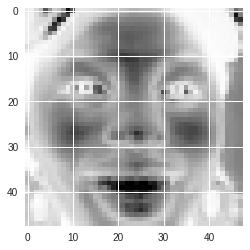

In [27]:
plt.imshow(images[2].reshape((48,48)))


In [0]:
images_test=[]

for i in range(len(X_test)):
    image_string = X_test[i]
    image = [int(x) for x in image_string.split()]
    image=np.array(image,dtype='float32')
    image=image.reshape((48,48,1))
    images_test.append(image)

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [31]:
y_train_hot=convert_to_one_hot(y_train,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [32]:
y_test_hot=convert_to_one_hot(y_test,7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [0]:
images_train=np.array(images)


In [0]:
images_test=np.array(images_test)


In [35]:
images=np.array(images)
images_test=np.array(images_test)
images_test.reshape((10767,2304)).shape

(10767, 2304)

In [36]:
images_test.shape

(10767, 48, 48, 1)

## Model Architecture

In [0]:
model = Sequential()
#layer1

model.add(Conv2D(64, (3, 3),padding = "same", activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.125))

#layer2

model.add(Conv2D(128, (5, 5), activation='relu',padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.125))

#layer3

model.add(Conv2D(512, (3, 3), activation='relu',padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.125))

#layer4

model.add(Conv2D(512, (3, 3), activation='relu',padding = "same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#FC1

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.125))

#FC2

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#FC3

model.add(Dense(7, activation='softmax'))



In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics = ["accuracy"])

## Summary of Model Architecture

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 128)       0         
__________

## Training

In [110]:
history=model.fit(images_train, y_train_hot, epochs=35, verbose=1, batch_size=128,
                                    initial_epoch=0, shuffle=False)


Epoch 1/35
25120/25120 [==============================] - 26s 1ms/step - loss: 2.2298 - acc: 0.2532
Epoch 2/35
25120/25120 [==============================] - 23s 924us/step - loss: 1.6730 - acc: 0.3937
Epoch 3/35
25120/25120 [==============================] - 23s 925us/step - loss: 1.4328 - acc: 0.4718
Epoch 4/35
25120/25120 [==============================] - 23s 924us/step - loss: 1.2890 - acc: 0.5223
Epoch 5/35
25120/25120 [==============================] - 23s 926us/step - loss: 1.1554 - acc: 0.5611
Epoch 6/35
25120/25120 [==============================] - 23s 927us/step - loss: 1.0513 - acc: 0.6057
Epoch 7/35
25120/25120 [==============================] - 23s 925us/step - loss: 0.9655 - acc: 0.6385
Epoch 8/35
25120/25120 [==============================] - 23s 922us/step - loss: 0.8710 - acc: 0.6761
Epoch 9/35
25120/25120 [==============================] - 23s 920us/step - loss: 0.8055 - acc: 0.6994
Epoch 10/35
25120/25120 [==============================] - 23s 923us/step - loss: 0.

#  Helper Functions

### For Plotting Accuracy

In [0]:

def plot_accuracy(history):
  plt.figure(figsize = (15,5))
  plt.plot(history.history['acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  
  # Plot training & validation loss values
  plt.figure(figsize=(15,5))
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  

### Accuracy and Saving the Model

In [0]:
def model_accuracy(x_test,y_test):
  scores = model.evaluate(images_test, y_test_hot, verbose=2)
  print(scores[1]*100,"%")

In [0]:
def save_model(model):
  model.save_weights("keras1.hdf5",overwrite=True)

In [114]:
y_predict = model.predict_classes(images_test, verbose=1)

10767/10767 [==============================] - 5s 455us/step


In [0]:
y_test =np.array(y_test)

In [0]:
cm = confusion_matrix(y_target=y_test, y_predicted=y_predict)

### For Plotting Confusion Matrix

In [0]:
def plot_cm(cm):
  plt.figure(figsize=(10,5))
  column = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
  df_cm = pd.DataFrame(cm, index=column,columns=column)
  ax = sns.heatmap(df_cm, cmap='Oranges', annot=True,fmt='g',cbar=False,linewidths=2)

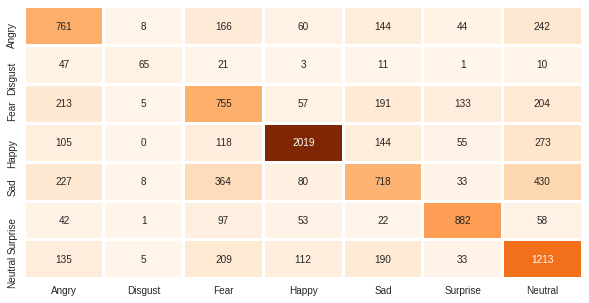

In [118]:
plot_cm(cm)

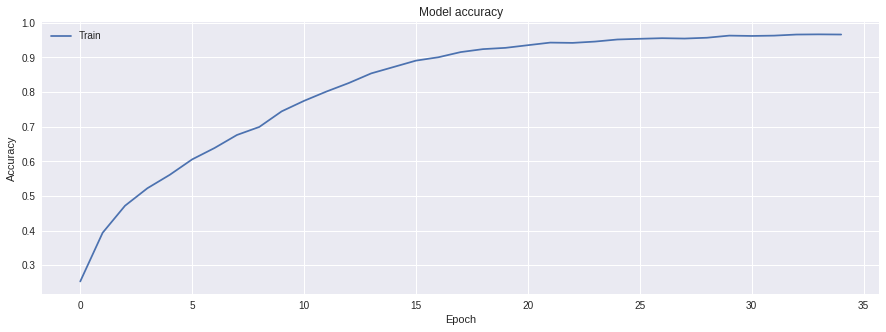

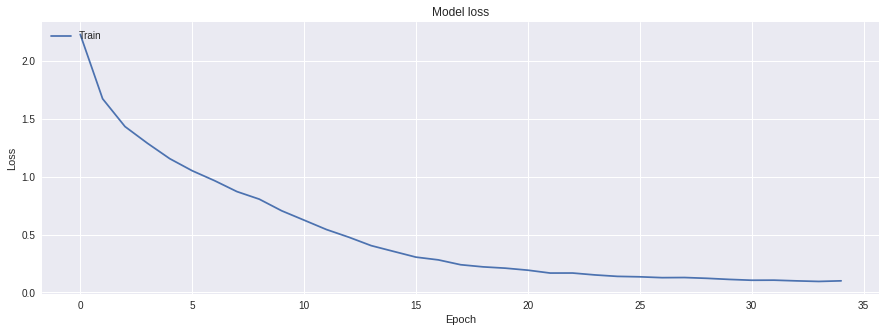

In [119]:
plot_accuracy(history)

In [120]:
model_accuracy(images_test,y_test_hot)

59.56162347997963 %
